# DS-SF-27 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

from sklearn import feature_selection, linear_model

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [5]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [16]:
df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


In [13]:
df.min()

admit         0.00
gre         220.00
gpa           2.26
prestige      1.00
dtype: float64

In [14]:
df.max()

admit         1.0
gre         800.0
gpa           4.0
prestige      4.0
dtype: float64

In [44]:
df.median()

admit         0.000
gre         580.000
gpa           3.395
prestige      2.000
dtype: float64

## Questions

> ### Question 1.  How many observations are in our dataset?

In [6]:
# TODO

df.shape

(400, 4)

In [7]:
df.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')

Answer: There are 400 observations in our dataset.


> ### Question 2.  Create a summary table.

In [9]:
# TODO
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [10]:
# TODO

df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

In [11]:
df.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

In [12]:
df.mean()

admit         0.317500
gre         588.040201
gpa           3.390930
prestige      2.486216
dtype: float64

Answer: Variance is defined as the average of the squared differences from the mean. Here, var for gre = 13369.95, and var for gpa = 0.144. Mathematically, gre has larger values, ranging from the min of 220, to the max of 800; gpa has a range from 2.26 as min, and 4.0 as max. When calculating the variance, you simply have more numbers that are lager, causing the variance to be higher. In the dataset, there is also a wider range of values, 220-800 vs 2.26-4.0, which results in a larger distribution of scores, thus larger variance.

As for the gre itself, the student's quality of work and corresponding score has a wider variance than gpa. With gpa, the student either earns an A, B, C, etc.

> ### Question 4.  Drop data points with missing data.

In [58]:
# TODO

df.dropna()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [59]:
# TODO

df.gre.isnull().sum()

2

In [60]:
df.gpa.isnull().sum()

2

In [62]:
df.loc[df['gre'].isnull()]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0


In [63]:
df.loc[df['gpa'].isnull()]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
236,1,660.0,NaN,NaN


Answer:

> ### Question 6.  Create boxplots for `gre` and `gpa`.

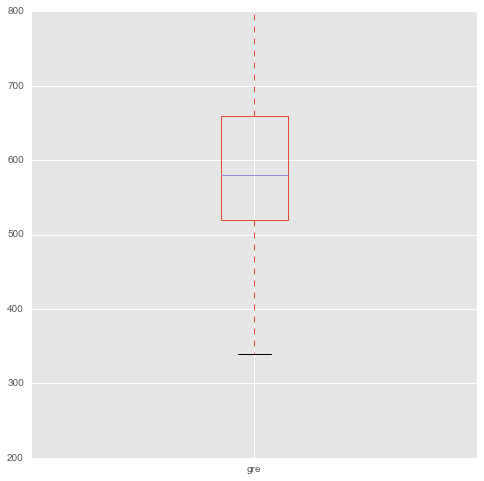

In [10]:
# TODO

df.gre.plot(kind = 'box', figsize = (8,8))

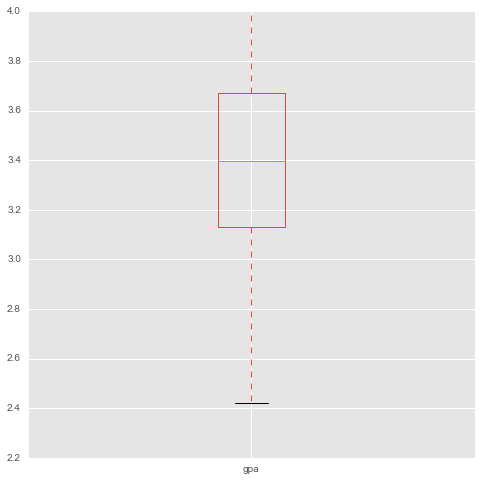

In [11]:
# TODO

df.gpa.plot(kind = 'box', figsize = (8,8))

In [47]:
Q1 = df.gpa.quantile(0.25)
Q3 = df.gpa.quantile(0.75)

IQR = Q3 - Q1

IQR

nan

In [49]:
Q2 = df.gpa.quantile(0.50)
Q4 = df.gpa.quantile(1.00)

IQR = Q4 - Q2

IQR

nan

In [48]:
Q1 = df.gre.quantile(0.25)
Q3 = df.gre.quantile(0.75)

IQR = Q3 - Q1

IQR

nan

In [50]:
Q2 = df.gre.quantile(0.50)
Q4 = df.gre.quantile(1.00)

IQR = Q4 - Q2

IQR

nan

> ### Question 7.  What do boxplots show?

Answer: Boxplots show the range of the data, with the min, max, and median. It also shows the median value between the min and the main median, and the median value between the max and main median. 

For gpa, the min is 2.26, max is 4.0, and the median is 3.4.

For gre, the min is different from the original output from #df.min(), which was 220. In the box plot, the min is around 340, and the max is 800, with the median at around 580.

Box plots divide the datasets into quartile ranges. When coding for the interqartile ranges (IQR), the outputs are nan, missing values.



> ### Question 8.  Plot the distribution of each variable.

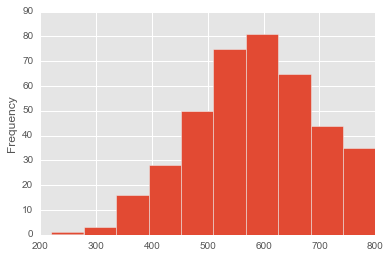

In [37]:
# TODO

df.gre.plot(kind="hist")

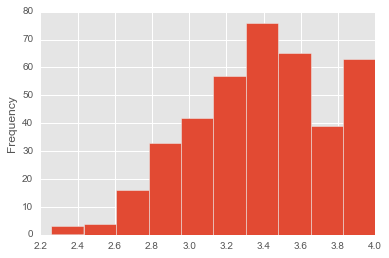

In [36]:
# TODO

df.gpa.plot(kind="hist")

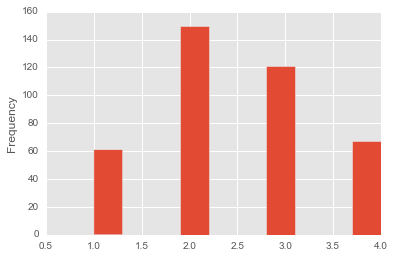

In [35]:
# TODO

df.prestige.plot(kind="hist")

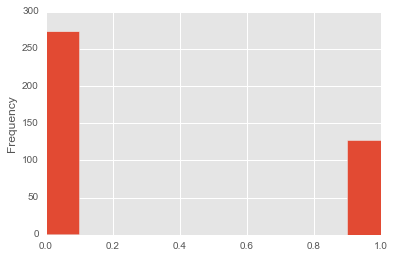

In [51]:
# TODO

df.admit.plot(kind='hist')

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

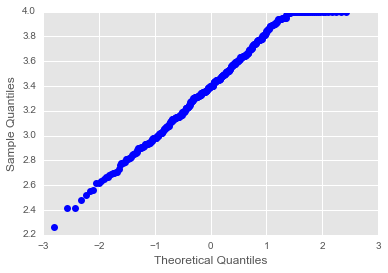

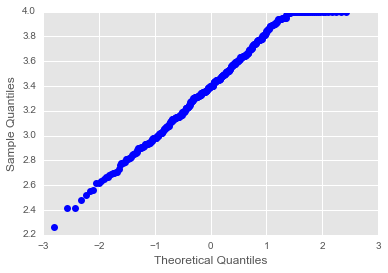

In [67]:
sm.qqplot(df.gpa, line = 's')

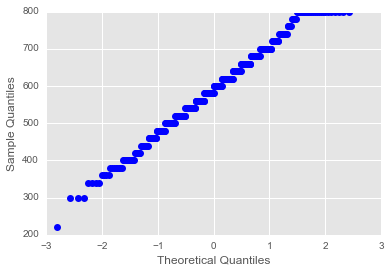

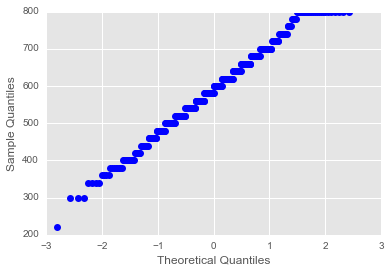

In [66]:
sm.qqplot(df.gre, line = 's')

Answer: No, we would not meet the requirement for normal distribution of gpa and gre. The data points are too spread out along the line.

> ### Question 10.  Create a correlation matrix for the dataset

In [7]:
# TODO

df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: gre and gpa have a weak collinearity, approximately 0.38.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: In order to determine if there is an association between graduate school admittance and prestige of undergraduate schools, we would need to first plot the values and look for normal distribtuion. Then we will perform a linear regression.

> ### Question 13.  What is your hypothesis?

Answer: My hypothesis is that there is a weak to negligible association between undergraduate school prestige, and graduate school admission. There is a possibility of a student having high gpa and gre scores and come from a school with low prestige, and vice versa.